In [ ]:
# 나눔고딕 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 런타임 다시 시작하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
!pip install geopandas

In [ ]:
!apt-get install -y libspatialindex-dev
!pip install rtree

In [4]:
import geopandas as gpd

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# matplotlib.rcParams['font.family']='Malgun Gothic'  # 한글폰트 지원
# matplotlib.rcParams['axes.unicode_minus']=False  # 그래프에서 마이너스 기호 깨짐 방지

import plotly
import plotly.express as px

import json
import pandas as pd
from pprint import pprint
from urllib import request

In [6]:
# 데이터 가져오기 및 데이터프레임으로 변환

total_data = []

for year in ['2018','2019','2020','2021','2022','2023']:
    # month_list = [str(month).zfill(2) for month in range(1, 13)]
    for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        try:
            s_key='BJ0BlwJg8I0JN02FYdDy3D6Own7X3vtc7G7i39Mp'
            url = f'https://bigdata.kepco.co.kr/openapi/v1/powerUsage/houseAve.do?year={year}&month={month}&metroCd=11&apiKey={s_key}&returnType=json'
            response = request.urlopen(url)
            json_response = response.read()
            users = json.loads(json_response)
            body = users['data']
            for b in body:
                total_data.append(b)
            
        except:
            pass

total_df = pd.json_normalize(total_data)
total_df

,year,month,metro,city,houseCnt,powerUsage,bill
0,2018,01,서울특별시,동대문구,182971,229.45,25806
1,2018,01,서울특별시,종로구,84348,225.71,29078
2,2018,01,서울특별시,성동구,140975,257.04,29464
3,2018,01,서울특별시,도봉구,143883,262.08,28996
4,2018,01,서울특별시,은평구,211171,248.53,29497
...,...,...,...,...,...,...,...
1570,2023,03,서울특별시,마포구,197058,203.38,26090
1571,2023,03,서울특별시,구로구,206134,206.16,25857
1572,2023,03,서울특별시,종로구,87645,181.00,25537
1573,2023,03,서울특별시,중구,75733,189.61,24726


# Part 2. 구 별로 확장하기

이번에는 가구당 평균 사용량을 구별로 구분하여 사용 경향에 차이가 있는지 확인해 보겠습니다.

## 서울시 자치구별 월별 전력소비량 비교 (가정용)

In [7]:
group3 = total_df.groupby(['city','month'])['powerUsage'].mean().reset_index()
group3

,city,month,powerUsage
0,강남구,01,263.596667
1,강남구,02,255.131667
2,강남구,03,234.556667
3,강남구,04,236.888000
4,강남구,05,227.172000
...,...,...,...
295,중랑구,08,310.612000
296,중랑구,09,249.530000
297,중랑구,10,199.406000
298,중랑구,11,203.254000


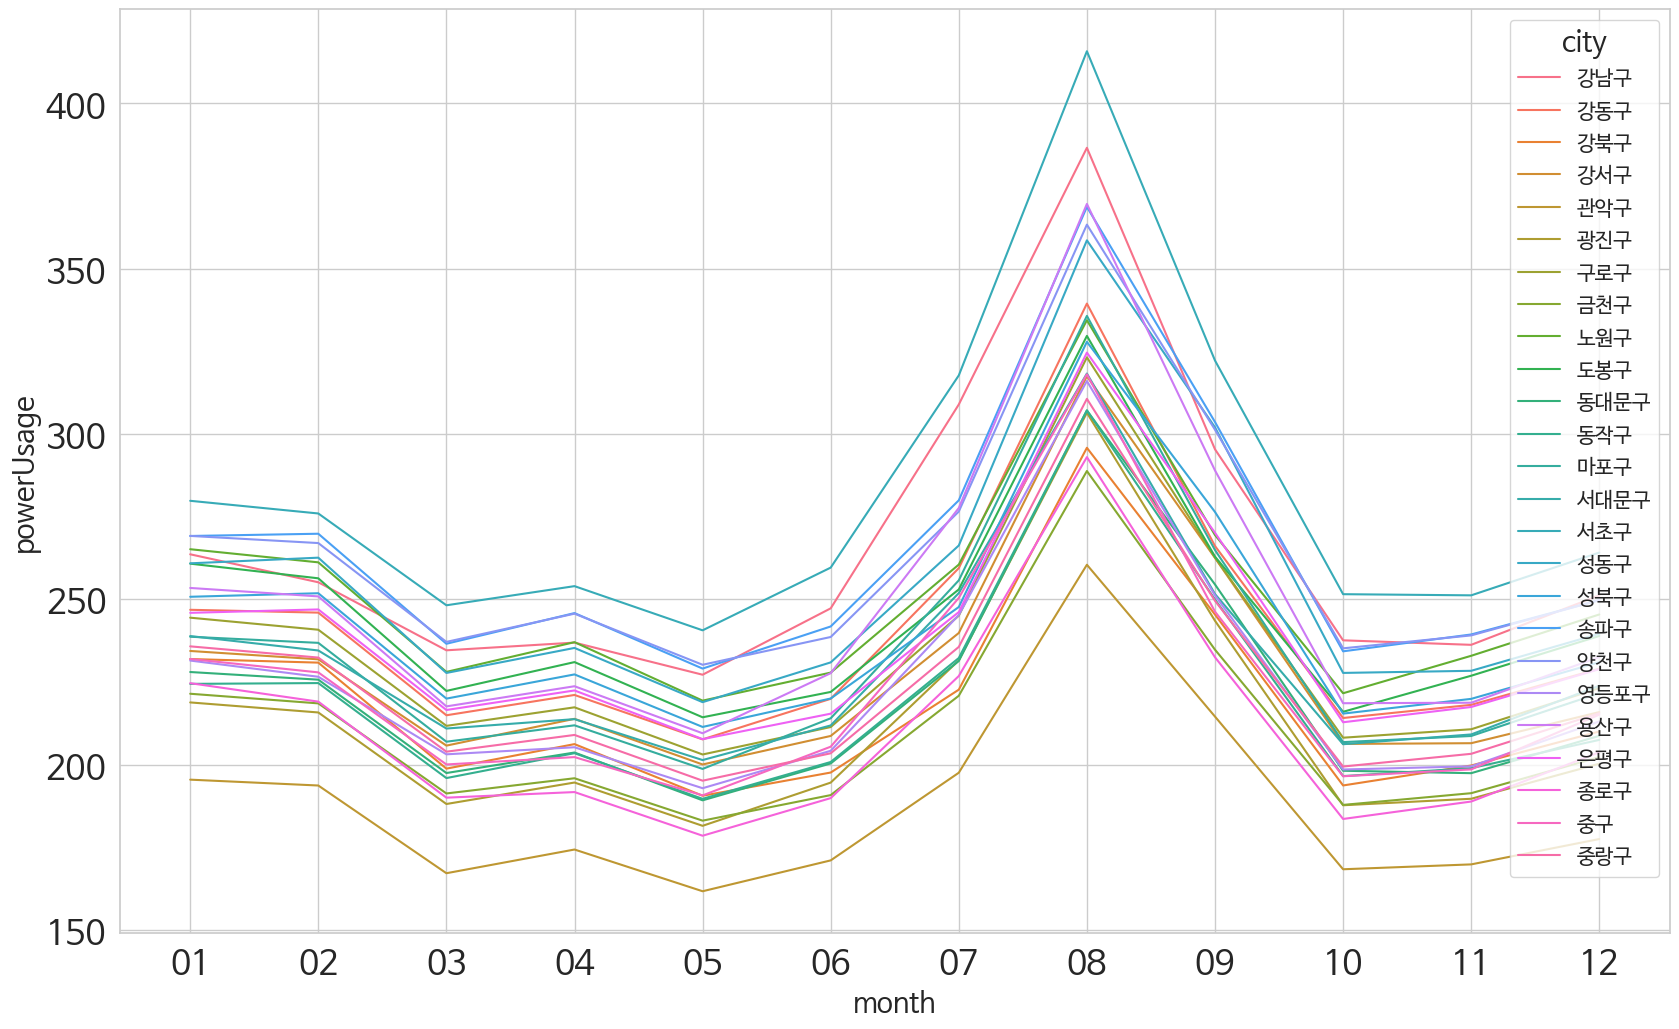

In [22]:
sns.set(font="NanumBarunGothic", rc={"axes.unicode_minus":False}, style='whitegrid')

fig,ax=plt.subplots(figsize=(20,12))
sns.lineplot(data = group3, x = 'month', y = 'powerUsage',hue = 'city')
plt.legend(title='city', fontsize='15', title_fontsize='20')
plt.xlabel('month',fontsize=20)
plt.ylabel('powerUsage', fontsize=20)
plt.tick_params(labelsize=25)

In [12]:
fig = px.line(group3, x = 'month', y = 'powerUsage', color='city',width=900, height=600)
fig.update_layout(title_text="서울시 자치구별 월별 전력소비량 비교", showlegend=False)
fig.show()

In [13]:
seoul_groupby = total_df.groupby([total_df.iloc[:,2], total_df.iloc[:,3]]).mean()
seoul_groupby

<ipython-input-13-396859a1b847>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



houseCnt  powerUsage          bill
metro city                                         
서울특별시 강남구   258190.825397  264.366190  32959.190476
      강동구   199439.222222  239.987302  26866.873016
      강북구   155648.000000  218.684444  23122.126984
      강서구   278965.777778  228.346508  24495.936508
      관악구   296280.507937  187.508095  19188.396825
      광진구   183518.476190  212.439841  23933.301587
      구로구   202165.507937  233.393333  24760.698413
      금천구   127138.952381  210.540794  22130.888889
      노원구   223460.301587  250.279365  24500.539683
      도봉구   147210.238095  244.582540  25400.428571
      동대문구  187965.444444  219.968095  23474.047619
      동작구   198142.222222  219.046190  23949.952381
      마포구   191569.412698  233.074286  25939.793651
      서대문구  157144.126984  230.863016  25453.841270
      서초구   182121.571429  281.054127  36913.142857
      성동구   140188.571429  254.670794  28331.952381
      성북구   209019.682540  241.571587  26972.000000
      송파구   280751.825397  263.708730  30570.412698
      양천구   188034.825397  262.488413  29388.428571
      영등포구  204218.650794  223.729683  24319.761905
      용산구   121921.698413  248.644921  32146.365079
      은평구   221509.952381  237.822540  26640.492063
      종로구    86295.396825  210.211746  25659.111111
      중구     71795.666667  223.408730  25462.126984
      중랑구   191907.809524  224.430000  23973.619048

In [14]:
# multiindex ({metro, city}) 를 city만 남게 drop
seoul_groupby.index = seoul_groupby.index.droplevel('metro')
seoul_groupby.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='city')

In [ ]:
# Shapefile 경로
shapefile_path = "./data/seoul_map/LARD_ADM_SECT_SGG_11.shp"
seoul_gdf = gpd.read_file(shapefile_path, encoding='utf-8')

# Geopandas로 Shapefile 로드
seoul_gdf = gpd.read_file(shapefile_path, encoding='utf-8')

In [16]:
city_mapping = {
    127: '강동구',
    128: '송파구',
    129: '강남구',
    130: '서초구',
    131: '관악구',
    132: '동작구',
    133: '영등포구',
    134: '금천구',
    135: '구로구',
    136: '강서구',
    137: '양천구',
    138: '마포구',
    139: '서대문구',
    140: '은평구',
    141: '노원구',
    142: '도봉구',
    143: '강북구',
    144: '성북구',
    145: '중랑구',
    146: '동대문구',
    147: '광진구',
    148: '성동구',
    149: '용산구',
    150: '중구',
    151: '종로구'
}

for index, row in seoul_gdf.iterrows():
    gid = row['GID']
    seoul_gdf.loc[index, 'city'] = city_mapping.get(gid, '')

In [17]:
# 데이터프레임과 'city'을 기준으로 Merge
merged_gdf = seoul_gdf.merge(seoul_groupby, left_on='city', right_index=True)

<Axes: >

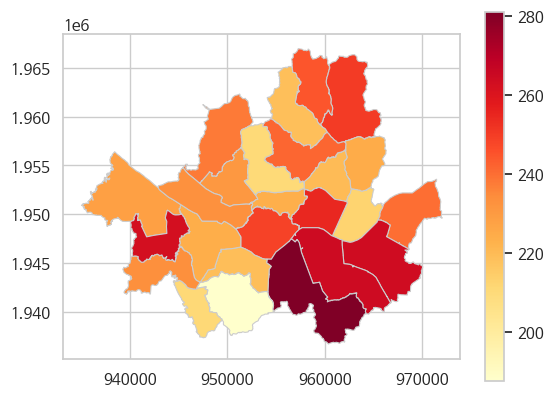

In [18]:
# 서울지도에 데이터 표시
merged_gdf.plot(column='powerUsage', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True)
# x, y 축은 지리 정보 (지리적 좌표 또는 경위도 값)

## 서울특별시로 데이터 한정

In [19]:
seoul_only = total_df[(total_df['metro']=='서울특별시')]
seoul_only

,year,month,metro,city,houseCnt,powerUsage,bill
0,2018,01,서울특별시,동대문구,182971,229.45,25806
1,2018,01,서울특별시,종로구,84348,225.71,29078
2,2018,01,서울특별시,성동구,140975,257.04,29464
3,2018,01,서울특별시,도봉구,143883,262.08,28996
4,2018,01,서울특별시,은평구,211171,248.53,29497
...,...,...,...,...,...,...,...
1570,2023,03,서울특별시,마포구,197058,203.38,26090
1571,2023,03,서울특별시,구로구,206134,206.16,25857
1572,2023,03,서울특별시,종로구,87645,181.00,25537
1573,2023,03,서울특별시,중구,75733,189.61,24726


## 구별 연간 평균

In [20]:
seoul_avg_annual = seoul_only.groupby(['year', 'city'])['powerUsage'].mean().reset_index()
seoul_avg_annual

,year,city,powerUsage
0,2018,강남구,264.918333
1,2018,강동구,239.450833
2,2018,강북구,221.919167
3,2018,강서구,231.105000
4,2018,관악구,192.975000
...,...,...,...
145,2023,용산구,239.576667
146,2023,은평구,236.166667
147,2023,종로구,207.920000
148,2023,중구,212.953333


## 구별 연간 평균의 변동추이 그래프

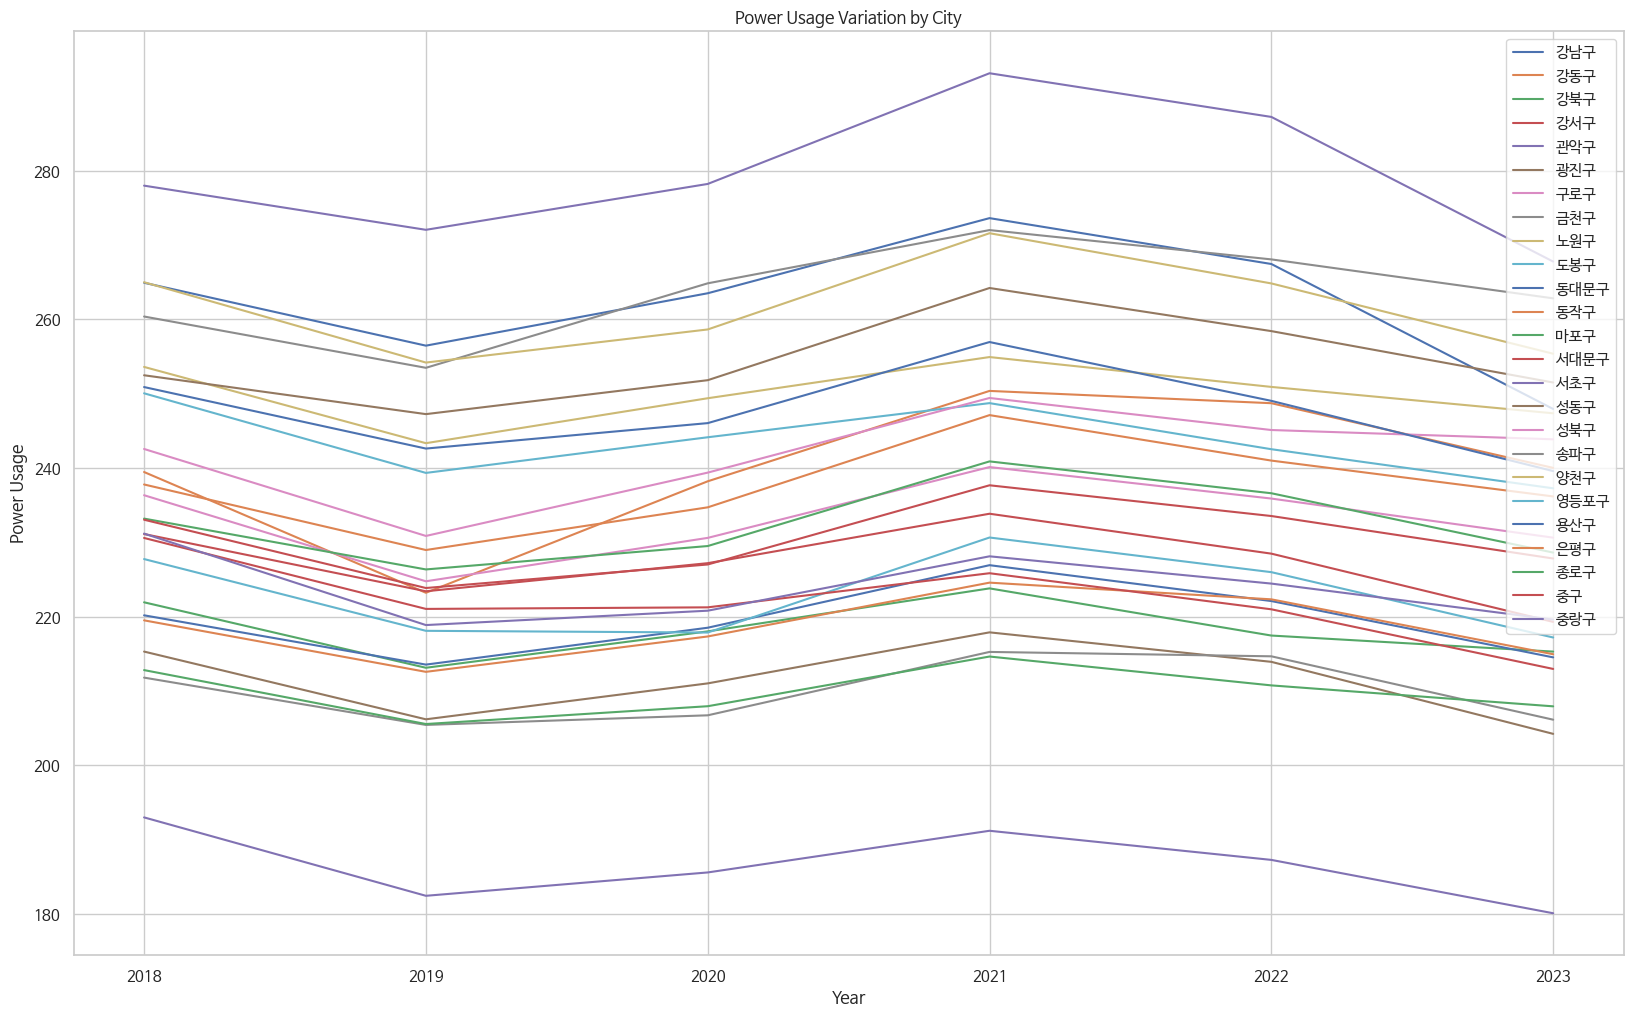

In [25]:
plt.figure(figsize=(20, 12))

for city in seoul_avg_annual['city'].unique():
    # 해당 도시의 데이터만 추출
    city_data = seoul_avg_annual[seoul_avg_annual['city'] == city]
    
    plt.plot(city_data['year'], city_data['powerUsage'], label=city)

plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Power Usage')
plt.title('Power Usage Variation by City')

plt.show()

이 데이터가 '가구당 평균'을 나타내는 것임을 감안하면, 5년 연속해서 연평균 사용량 최상위인 강남구 그리고 5년 연속해서 연평균 사용량 최하위인 중랑구의 차이가 명백합니다.

그렇다면, 구별 차이를 추가적으로 확인하기 위하여, 구별 5년 평균 사용량을 추출하여 상위 3개, 하위 3개 구의 명단을 뽑아보고 이들을 대비하여 살펴봅니다.

## 서울특별시의 구별 전체 주택용 전기 사용량 가져오기

In [26]:
cnt = 1
total_data = []

for year in ['2018', '2019','2020','2021','2022']:
    for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        try:
            url = f'https://bigdata.kepco.co.kr/openapi/v1/powerUsage/contractType.do?year={year}&month={month}&metroCd=11&cntrCd=100&apiKey={s_key}&returnType=json'
            response = request.urlopen(url)
            json_response = response.read()
            users = json.loads(json_response)
            body = users['data']
            for b in body:
                total_data.append(b)
        except:
            pass

total_df_absolute_usage = pd.json_normalize(total_data)
total_df_absolute_usage

,year,month,metro,city,cntr,custCnt,powerUsage,bill,unitCost
0,2018,01,서울특별시,강남구,주택용,133550,76790612,9529766538,124.1
1,2018,01,서울특별시,강동구,주택용,107356,49434736,5693227260,115.2
2,2018,01,서울특별시,강북구,주택용,118038,37057987,4197986301,113.3
3,2018,01,서울특별시,강서구,주택용,166229,70423923,7923699325,112.5
4,2018,01,서울특별시,관악구,주택용,218698,58191256,6153478164,105.7
...,...,...,...,...,...,...,...,...,...
1495,2022,12,서울특별시,용산구,주택용,79006,34862606,5129896697,147.1
1496,2022,12,서울특별시,은평구,주택용,161602,55347799,7336426975,132.6
1497,2022,12,서울특별시,종로구,주택용,65958,22161770,3230549039,145.8
1498,2022,12,서울특별시,중구,주택용,43592,18061905,2491573215,137.9


## 서울특별시의 연간 총 사용량

In [27]:
df_transformed = total_df_absolute_usage.groupby('year')['powerUsage'].sum().reset_index()
seoul_total = df_transformed[['year', 'powerUsage']].copy()
seoul_total.columns = ['year', 'total_powerUsage']
seoul_total

,year,total_powerUsage
0,2018,14097306324
1,2019,13814667448
2,2020,14302036129
3,2021,14999275604
4,2022,14906206494


## 서울특별시 구별 연간 총 사용량

In [29]:
df_transformed = total_df_absolute_usage.groupby(['year', 'city']).agg({'powerUsage': 'sum', 'custCnt': 'mean'}).reset_index()

seoul_total_by_city = df_transformed.copy()

seoul_total_by_city.columns = ['year', 'city', 'total_powerUsage', 'average_custCnt']
seoul_total_by_city

,year,city,total_powerUsage,average_custCnt
0,2018,강남구,912402562,131462.750000
1,2018,강동구,564680640,108350.583333
2,2018,강북구,420470494,119162.666667
3,2018,강서구,821240269,167492.666667
4,2018,관악구,676079238,222738.166667
...,...,...,...,...
120,2022,용산구,443057480,79179.083333
121,2022,은평구,698647085,161880.916667
122,2022,종로구,272931969,65932.416667
123,2022,중구,219366084,43441.750000


## 2018-2022 기간의 구별 평균 기준 TOP10 구

In [30]:
dfs = []
for year in seoul_total_by_city['year'].unique():
    # 해당 year의 데이터를 선택합니다.
    year_data = seoul_total_by_city[seoul_total_by_city['year'] == year]

    # total_powerUsage의 비율을 계산합니다.
    powerUsage_ratio = (year_data['total_powerUsage'] / year_data['total_powerUsage'].sum()) * 100
    powerUsage_ratio = powerUsage_ratio.round(2)  # 소수점 아래 2자리까지 나타냅니다.

    # average_custCnt의 비율을 계산합니다.
    custCnt_ratio = (year_data['average_custCnt'] / year_data['average_custCnt'].sum()) * 100
    custCnt_ratio = custCnt_ratio.round(2)  # 소수점 아래 2자리까지 나타냅니다.

    # 비율의 차이를 계산합니다.
    diff = powerUsage_ratio - custCnt_ratio

    # 데이터프레임을 생성하여 리스트에 추가합니다.
    df = pd.DataFrame({'city': year_data['city'],
                       'powerUsage_ratio': powerUsage_ratio,
                       'custCnt_ratio': custCnt_ratio,
                       'diff': diff})
    
    # diff를 내림차순으로 정렬합니다.
    df = df.sort_values('diff', ascending=False)
    
    dfs.append(df)

# 각 year별로 생성된 데이터프레임을 합칩니다.
result_df = pd.concat(dfs, keys=seoul_total_by_city['year'].unique(), names=['year'])

# 결과를 출력합니다.
result_df

city  powerUsage_ratio  custCnt_ratio  diff
year                                                
2018 14   서초구              5.05           3.11  1.94
     8    노원구              4.94           3.09  1.85
     0    강남구              6.47           4.71  1.76
     17   송파구              6.62           5.19  1.43
     18   양천구              4.59           3.53  1.06
...       ...               ...            ...   ...
2022 121  은평구              4.69           5.60 -0.91
     124  중랑구              3.77           4.93 -1.16
     102  강북구              2.83           4.20 -1.37
     105  광진구              3.41           5.14 -1.73
     104  관악구              4.67           8.31 -3.64

[125 rows x 4 columns]

In [31]:
seoul_avg_5years = seoul_avg_annual.groupby('city')['powerUsage'].mean().reset_index()
seoul_avg_5years.columns = ['city', 'powerUsage(5 years avg)']
seoul_avg_5years = seoul_avg_5years.sort_values('powerUsage(5 years avg)', ascending=False)
seoul_avg_5years

,city,powerUsage(5 years avg)
14,서초구,279.393611
17,송파구,263.598056
0,강남구,262.312500
18,양천구,261.598611
15,성동구,254.274028
8,노원구,249.913611
20,용산구,247.511389
9,도봉구,243.667222
16,성북구,241.856806
1,강동구,239.989722


In [32]:
#최상위 3개, 최하위 3개 구의 이름을 담은 리스트
# powerUsage(5 years avg) 열에서 상위 3개와 하위 3개의 값을 가지는 city들의 이름을 추출합니다.
top_3_cities = seoul_avg_5years.head(3)['city'].tolist()
bottom_3_cities = seoul_avg_5years.tail(3)['city'].tolist()
top_bottom_6_cities = top_3_cities + bottom_3_cities

print("상위 3개의 city:", top_3_cities)
print("하위 3개의 city:", bottom_3_cities)
print("상하위 각 3개의 city:", top_bottom_6_cities)

상위 3개의 city: ['서초구', '송파구', '강남구']
하위 3개의 city: ['금천구', '종로구', '관악구']
상하위 각 3개의 city: ['서초구', '송파구', '강남구', '금천구', '종로구', '관악구']


## 상하위 각각 3개 구별 서울 전체중 사용량비, 가구수비 비교

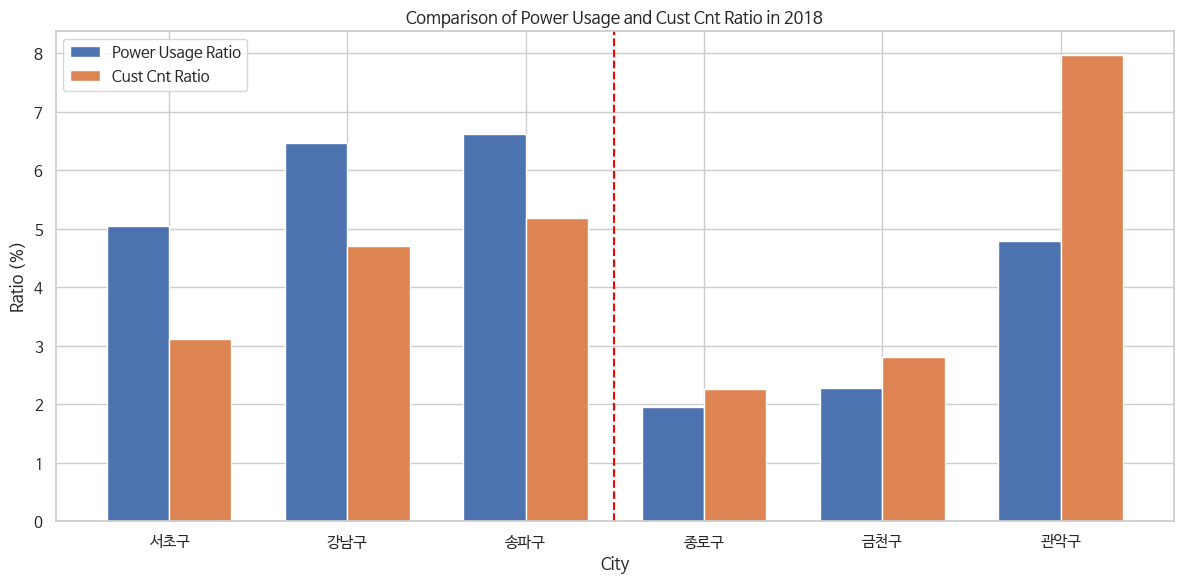

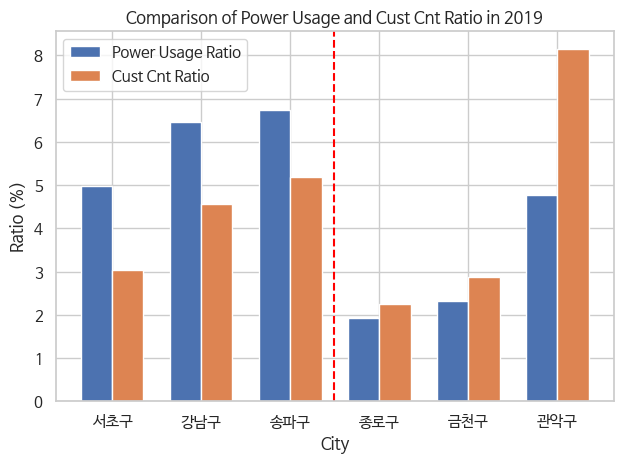

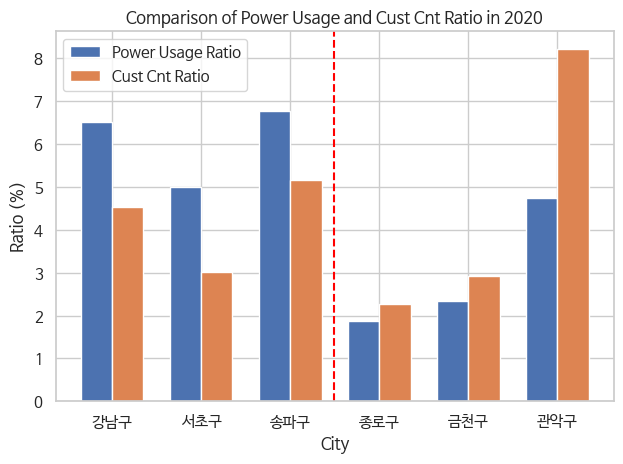

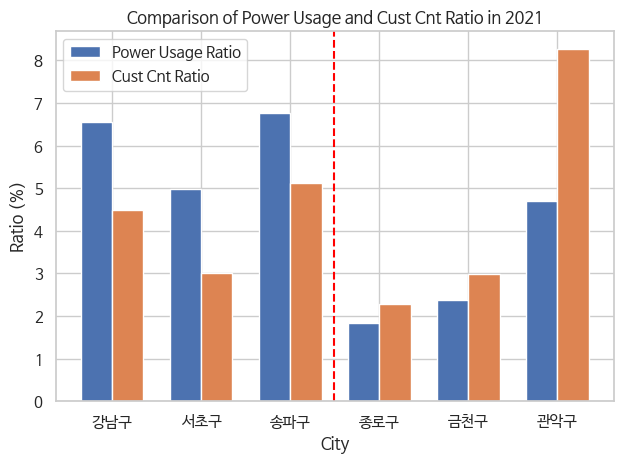

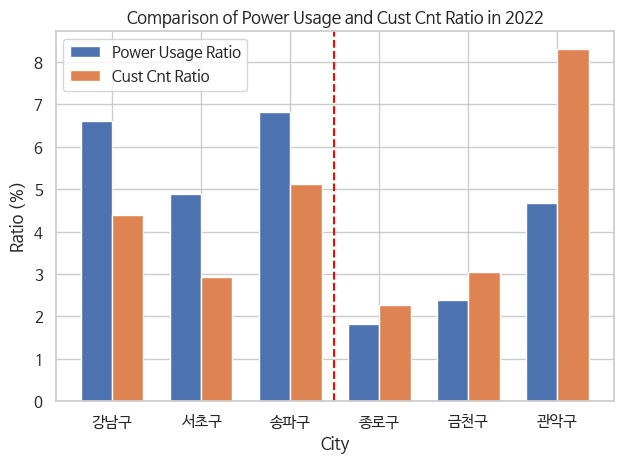

In [33]:
import numpy as np
# top_bottom_6_cities 리스트에 포함된 6개의 city 데이터를 추출합니다.
top_bottom_cities_data = result_df[result_df['city'].isin(top_bottom_6_cities)]

# 2022년 데이터 필터링
data_2022 = top_bottom_cities_data.loc['2022']


# 년도별 그래프 그리기
years = top_bottom_cities_data.index.levels[0]  # 데이터에 있는 모든 년도를 가져옵니다.

# 그래프 옵션 설정
plt.figure(figsize=(12, 6))
bar_width = 0.35

# 년도별로 그래프 그리기
for year in years:
    data_year = top_bottom_cities_data.loc[year]
    x = np.arange(len(data_year))

    plt.bar(x, data_year['powerUsage_ratio'], width=bar_width, label='Power Usage Ratio')
    plt.bar(x + bar_width, data_year['custCnt_ratio'], width=bar_width, label='Cust Cnt Ratio')
    plt.xticks(x + bar_width / 2, data_year['city'])

    plt.xlabel('City')
    plt.ylabel('Ratio (%)')
    plt.title(f'Comparison of Power Usage and Cust Cnt Ratio in {year}')
    plt.legend()

    # x축의 가운데에 수직으로 구분선을 그어줍니다.
    plt.axvline(x=len(data_year) / 2 - 0.33, color='red', linestyle='--')

    plt.tight_layout()
    plt.show()